## Preparing the Data

variance of cai graphs, for each gene.
then take mean of these variance values.
find p-value for this mean of variance. do for the same 12 genes.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

list_strains= os.listdir(r"C:\Users\husay\Desktop\Biotech\Species_genomes\Ecoli_strains")

gene_name=input("Enter the gene name :")
protein_type=input("Enter protein type :")

all_cai_data=[]

#looping the strains
for j in range(3):
    all_cai_data.append([])
    list_strains_new=[] #keeps track of strains containg the gene
    for strain in list_strains:
        #if list_strains.index(strain)>1 : break
    
        #below file paths can be changed
        filepath=r"C:\Users\husay\Desktop\Biotech\Species_genomes\Ecoli_strains/"+strain+"/"+gene_name+" ("+protein_type+")"+"/CAI Values.csv"
        if not os.path.exists(filepath):
            continue
        list_strains_new.append(strain)
        df=pd.read_csv(filepath,usecols=[j+2])
        cai_val=df.values.tolist()
        cai_val=np.array(cai_val)
        cai_val=np.transpose(cai_val)
        cai_val=cai_val[0]
        all_cai_data[j].append(cai_val)

Enter the gene name :udp
Enter protein type :Cytoplasm


## Analyzing the Data

In [198]:
print(len(all_cai_data)) #mwf * no. of strains * CAI
print(len(all_cai_data[0]))
print(len(all_cai_data[0][0]))
print(all_cai_data[0][0][0])

3
3049
360
0.0004420482702567


## Finding the region of flatness

In [199]:
max_val=[]

for j in range(3):
    max_val.append([])
    for i in range(len(all_cai_data[j])):
        max_val[j]=np.append(max_val[j],max(all_cai_data[j][i]))

In [200]:
flat_regions=[] #list of coords containing (loci,length)
#shape is 3*no. of strains*x
avg_flat_regions=[0,0,0]
avg_len_flat=[0,0,0]
coords_list=[] #for storing all coords irrespective of strain

#to avoid direct comparison of floats with zero
def isclose(a, b, rel_tol, abs_tol):
    return abs(a-b) <= max(rel_tol * max(abs(a), abs(b)), abs_tol)

rel_tol=1e-05
min_len=15 #minimum length of the flat region

for j in range(len(all_cai_data)):
    flat_regions.append([])
    coords_list.append([])
    for i in range(len(all_cai_data[j])):
        flat_regions[j].append([])
        k=0
        
        abs_tol=max_val[j][i]/((j+3)*20) #this value can be adjusted accordingly
        
        while(k<len(all_cai_data[j][i])):
            if isclose(all_cai_data[j][i][k],0,rel_tol,abs_tol)==False:
                k+=1
                continue;
            length_flat=0
            loci=k
            while(k<len(all_cai_data[j][i]) and isclose(all_cai_data[j][i][k],0,rel_tol,abs_tol)==True):
                length_flat+=1
                k+=1
            if length_flat>=min_len: #adjusting this will change minimum length
                coord=(loci,length_flat)
                flat_regions[j][i].append(coord)
                coords_list[j].append(coord)
        avg_flat_regions[j]+=len(flat_regions[j][i])
    avg_flat_regions[j]=(avg_flat_regions[j]/len(all_cai_data[j]))
print("no. of moving window frames =" ,len(flat_regions)) 
print("no. of strains present =" ,len(flat_regions[0])) #here "0" represents mwf=15
print(flat_regions[0][0])
print(len(coords_list)) 
print(len(coords_list[0])) 
coord_df=pd.DataFrame(coords_list[0], columns=['Loci', 'Length'])
print(coord_df)
print(avg_flat_regions) # amount of clusters we expect

no. of moving window frames = 3
no. of strains present = 3049
[(77, 50)]
3
4378
      Loci  Length
0       77      50
1       78      50
2       77      54
3      293      21
4       77      50
...    ...     ...
4373    77      50
4374   102      25
4375   102      25
4376    77      50
4377    76      51

[4378 rows x 2 columns]
[1.435880616595605, 3.0819940964250576, 2.419809773696294]


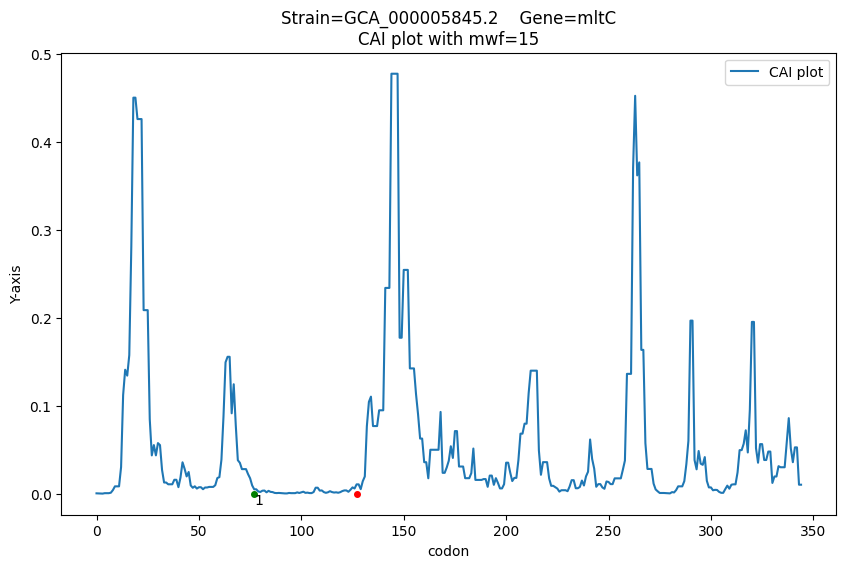

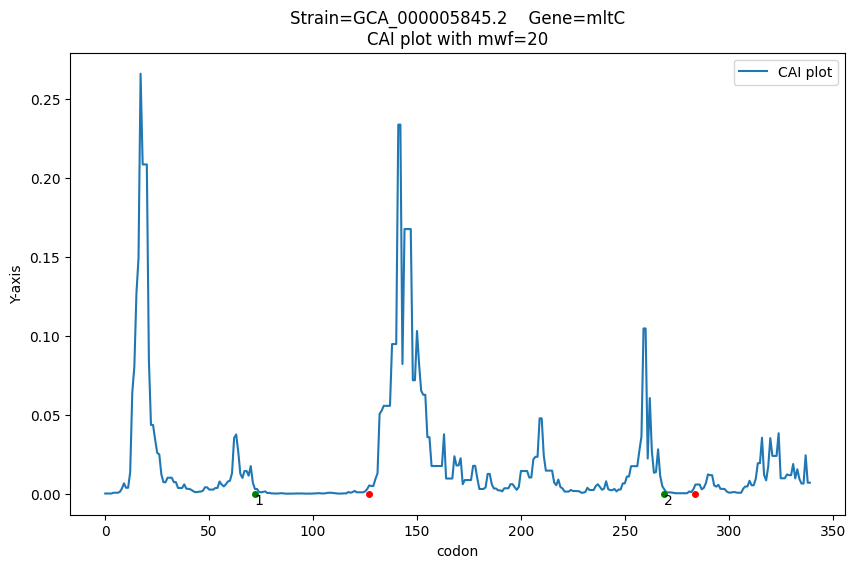

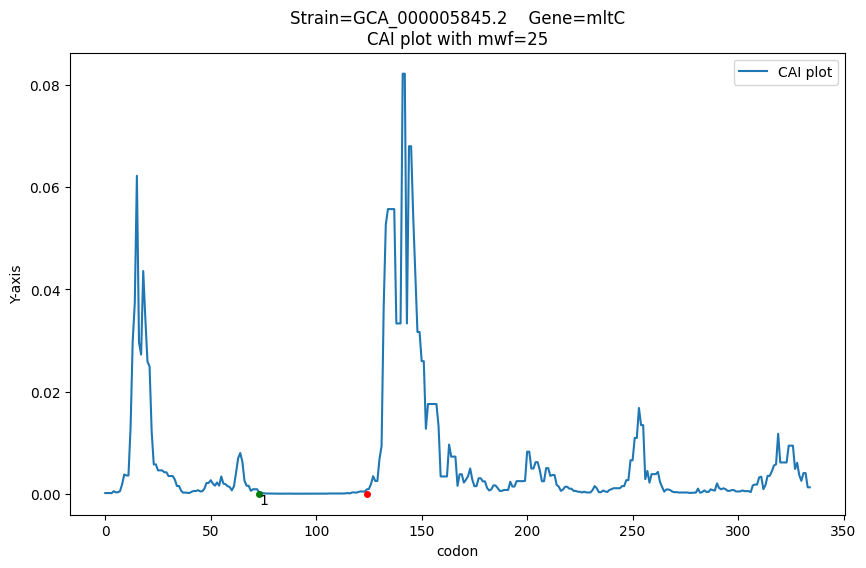

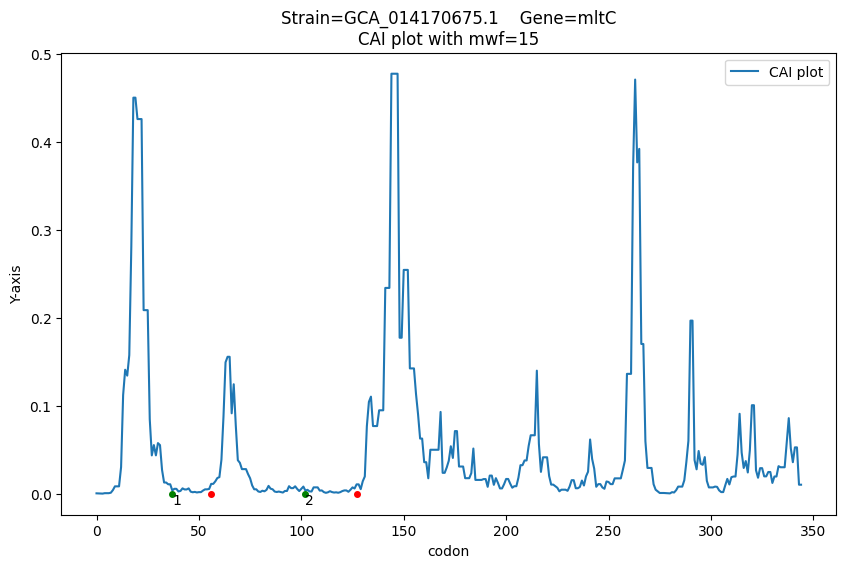

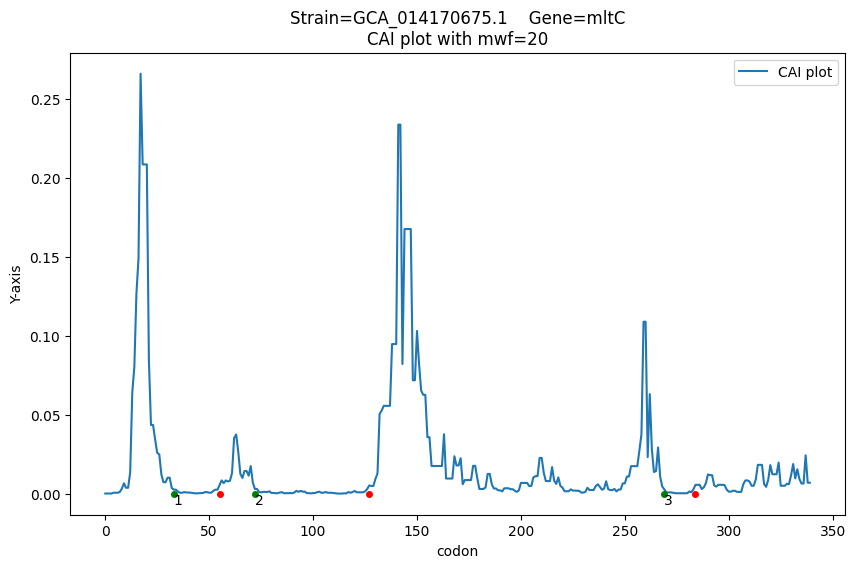

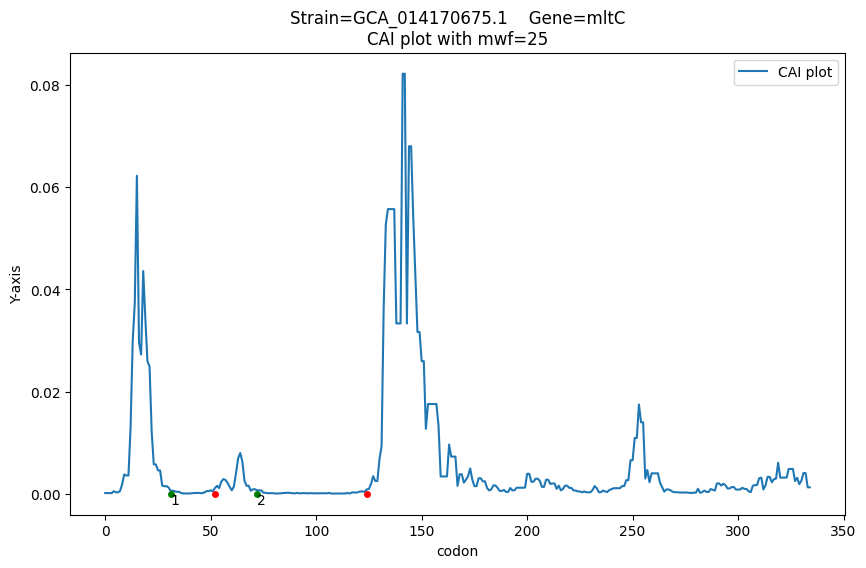

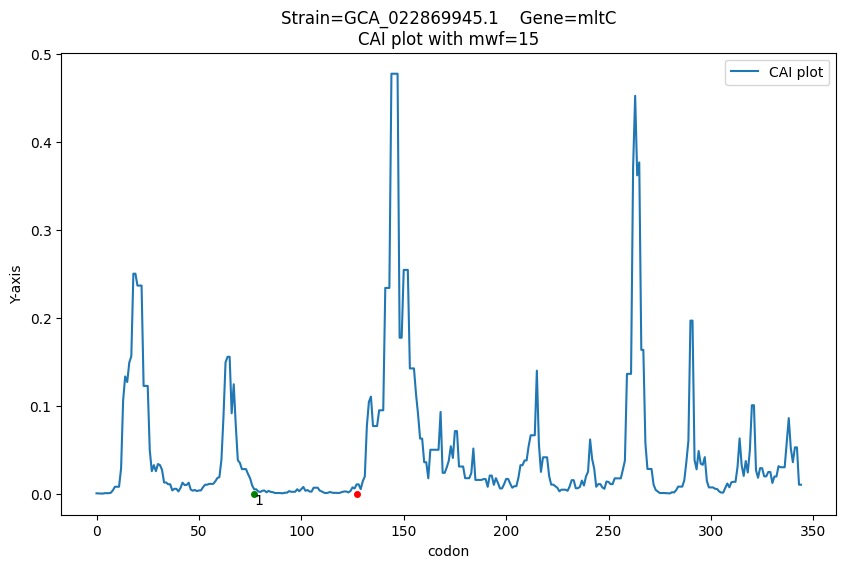

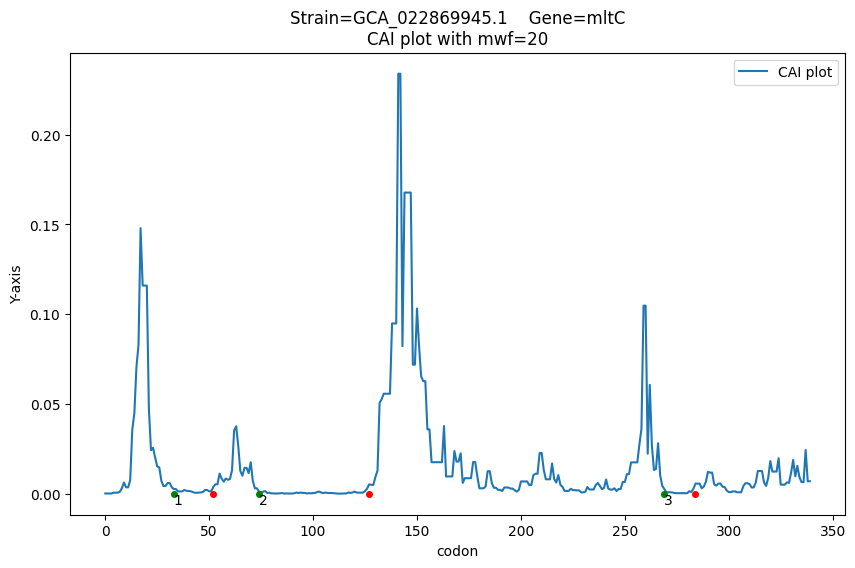

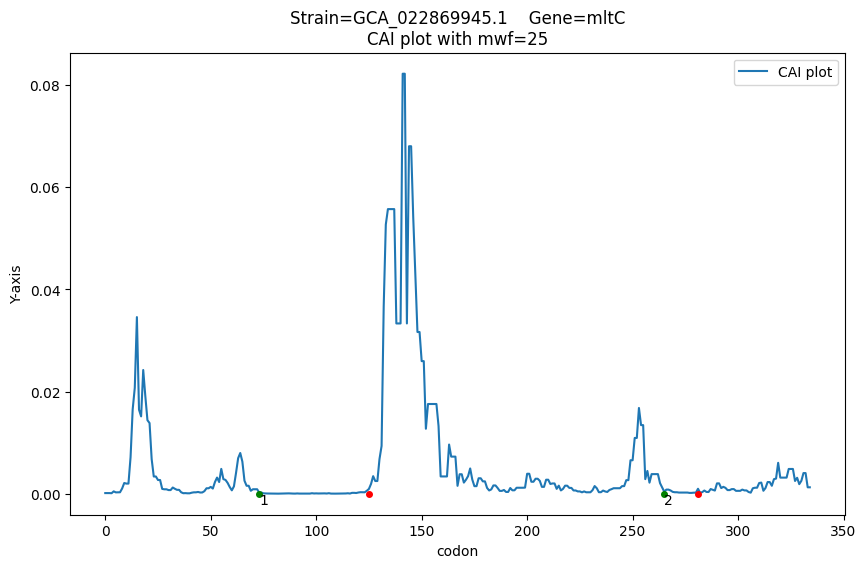

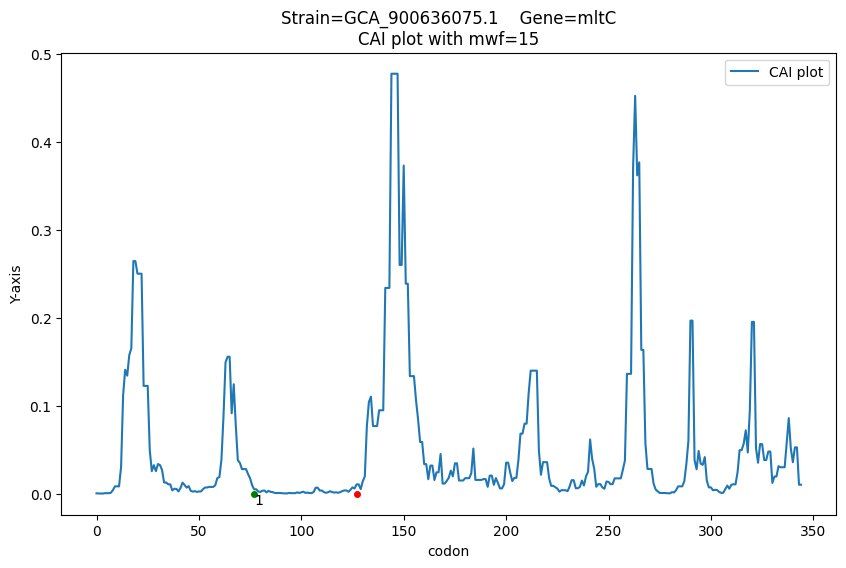

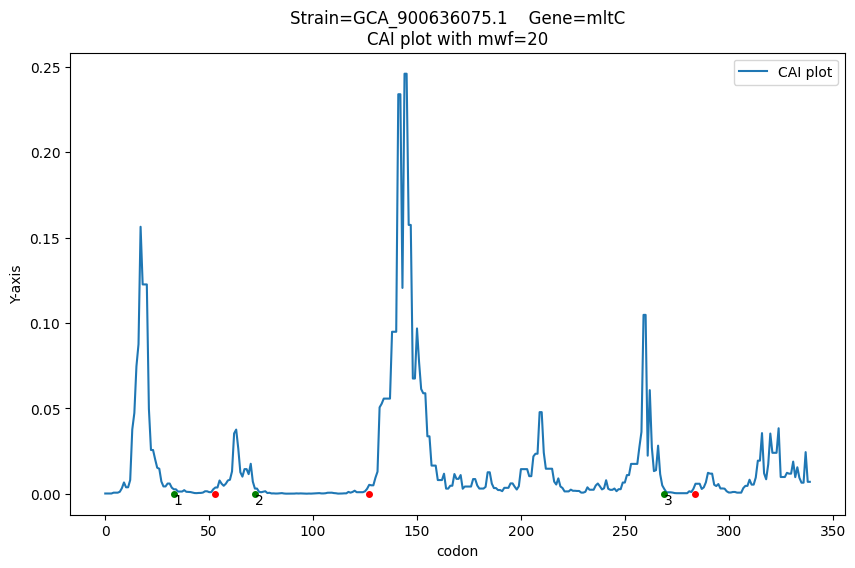

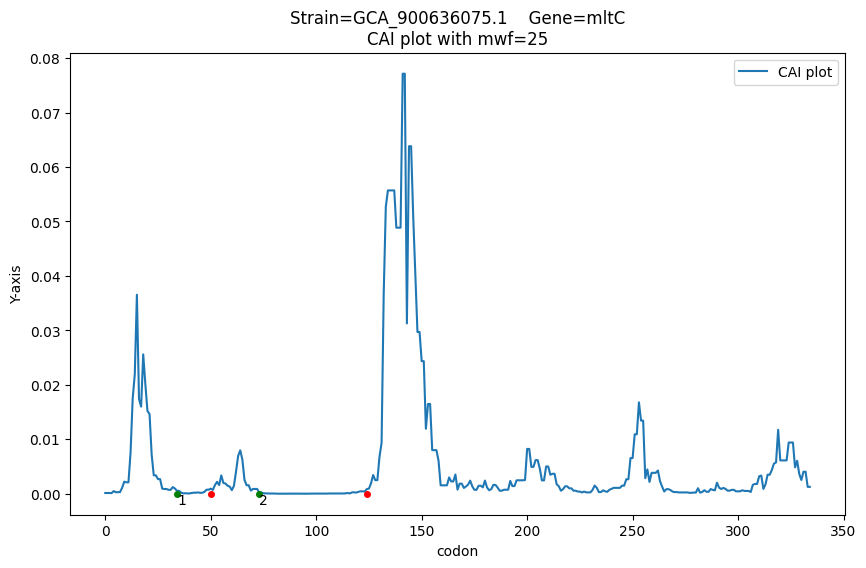

In [201]:
# Below code saves the values DON'T RUN THIS CELL
for strain in list_strains_new: 
    #break
    j=list_strains_new.index(strain)
    #filepath1 = os.path.join(r'C:\Users\husay\Desktop\Biotech\Species_genomes\Ecoli_strains/'+strain+'/'+gene_name+" ("+protein_type+")", 'flat_regions.txt')
    
    #with open(filepath1, 'w') as file:
    #    file.write("Flat Regions List\n")
    #    for i in range(3):
    #        file.write("mwf="+str((i+3)*5)+"\n")
    #        file.write(str(flat_regions[i][j])+"\n")
    for n in range(3):
        if not j%1000==0: break   #condition for plotting only 1000th position graphs
        #if len(flat_regions[n][j])!=6: break
        #plotting the graphs
        x=np.arange(len(all_cai_data[n][j]))
        plt.figure(figsize=(10,6))
        plt.plot(x, all_cai_data[n][j],label='CAI plot')
        
        for i in range(len(flat_regions[n][j])):
            plt.plot(flat_regions[n][j][i][0],0,'o',markersize=4,color='g')
            plt.text(flat_regions[n][j][i][0],0,str(i+1),va="top")
            plt.plot(flat_regions[n][j][i][0]+flat_regions[n][j][i][1],0,'o',markersize=4,color='r')
        plt.xlabel("codon")
        plt.ylabel("Y-axis")
        plt.title("Strain="+strain+"    Gene="+gene_name+"\nCAI plot with mwf="+str((n+3)*5))
        plt.legend()
        plt.show()

The flat_regions list contains all the data required for plot flatness frequency plots, similar to histograms.

# Plotting scatter plots

In [202]:
print(coord_df)
data=np.array(coord_df.values.tolist())
print(np.shape(data))

      Loci  Length
0       77      50
1       78      50
2       77      54
3      293      21
4       77      50
...    ...     ...
4373    77      50
4374   102      25
4375   102      25
4376    77      50
4377    76      51

[4378 rows x 2 columns]
(4378, 2)


# plotting 3d graphs

In [203]:
print((coords_list[0][0])) #mwf * (loci,length)

(77, 50)


In [204]:
coords_set=list(set(coords_list[0])) #doing only for mwf=15
for i in range(len(coords_set)):
    count=0
    for coord in coords_list[0]:
        if coord==coords_set[i]:
            count+=1
    coords_set[i]=list(coords_set[i])
    coords_set[i].append(count)

In [205]:
#print((coords_set))
coords_df=pd.DataFrame(coords_set, columns=['x','y','z'])
print(coords_df)

       x   y    z
0     75  51    2
1    226  61    1
2    102  25  204
3    314  24    2
4      0  87    1
..   ...  ..  ...
126  165  15    1
127  314  31    1
128   77  51   20
129   24  15   30
130  176  21    1

[131 rows x 3 columns]


In [206]:
import plotly.express as px
fig = px.scatter_3d(coords_df, x='x', y='y', z='z',color='z',title=gene_name+" ("+protein_type+")")
fig.write_html(r'C:\Users\husay\Desktop\Biotech\Plotly Graphs/'+gene_name+" ("+protein_type+")"+".html")
fig.show()

# Applying clustering

In [207]:
print(data[:,0]) #this gives us the first column ie. all the x values
print(data)

[ 77  78  77 ... 102  77  76]
[[ 77  50]
 [ 78  50]
 [ 77  54]
 ...
 [102  25]
 [ 77  50]
 [ 76  51]]


The DBSCAN algorithm uses two parameters: minPts: The minimum number of points (a threshold) clustered together for a region to be considered dense. eps (ε): A distance measure that will be used to locate the points in the neighborhood of any point.
class sklearn.cluster.DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)

In [209]:
#DBSCAN clustering
from sklearn.cluster import DBSCAN

#the parameters of class dbscan are commented below

# class sklearn.cluster.DBSCAN(eps=0.5, *, min_samples=5,
#        metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
for i in range(500,1501,500):
    for eps in range(5,16,5):
        dbscan = DBSCAN(eps=eps, min_samples=i)
        print('\n',dbscan.fit(data))
        labels = dbscan.labels_ 
        for l in range(-1,np.max(labels)+1):
            cluster_points=data[labels==l]
            x_bar=np.mean(cluster_points[:,0])
            y_bar=np.mean(cluster_points[:,1])
            std=0
            for point in cluster_points:
                std+=(point[0]-x_bar)**2+(point[1]-y_bar)**2
            std=(std/len(cluster_points))
            std=np.sqrt(std)
            print('Cluster=',l,'\tno. of points=',len(cluster_points),'\tstd =',std)
        df=pd.DataFrame(list(zip(data[:,0],data[:,1],labels)), columns =['Loci', 'Length','Label'])
        fig=px.scatter(df,x='Loci',y='Length',color='Label',title=gene_name+" ("+protein_type+")"+'min_samples='+str(i)+' and eps='+str(eps)+' clusters='+str(np.max(labels)+1))
        fig.show()


 DBSCAN(eps=5, min_samples=500)
Cluster= -1 	no. of points= 1772 	std = 103.50921645405305
Cluster= 0 	no. of points= 2606 	std = 2.430644128579635

 DBSCAN(eps=10, min_samples=500)
Cluster= -1 	no. of points= 1619 	std = 103.64875426388696
Cluster= 0 	no. of points= 2759 	std = 3.480738921092468

 DBSCAN(eps=15, min_samples=500)
Cluster= -1 	no. of points= 858 	std = 77.01754446904484
Cluster= 0 	no. of points= 2762 	std = 3.552569423210154
Cluster= 1 	no. of points= 758 	std = 11.172143005341777

 DBSCAN(eps=5, min_samples=1000)
Cluster= -1 	no. of points= 1772 	std = 103.50921645405305
Cluster= 0 	no. of points= 2606 	std = 2.430644128579635

 DBSCAN(eps=10, min_samples=1000)
Cluster= -1 	no. of points= 1619 	std = 103.64875426388696
Cluster= 0 	no. of points= 2759 	std = 3.480738921092468

 DBSCAN(eps=15, min_samples=1000)
Cluster= -1 	no. of points= 1616 	std = 103.63247361946986
Cluster= 0 	no. of points= 2762 	std = 3.552569423210154

 DBSCAN(eps=5, min_samples=1500)
Cluster= -